In [1]:
import numpy as np

X_train = np.load('/content/X_train.npy')
y_train = np.load('/content/y_train.npy')
X_test = np.load('/content/X_test.npy')
y_test = np.load('/content/y_test.npy')

In [2]:
# Train Data
print ("X_train  shape: " + str(X_train.shape))
print ("X_train  data: " + str(len(X_train)))
print ("y_train data: " + str(len(y_train)))
print ("Dimensions of x_train:" + str(X_train[1].shape))
print ("Labels in x_train:" + str(y_train.shape))

#Test Data
print("\n")
print ("X_test  shape: " + str(X_test.shape))
print ("X_test data: " + str(len(X_test)))
print ("y_test data: " + str(len(y_test)))
print ("Dimensions of x_test:" + str(X_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

X_train  shape: (6985, 144, 216)
X_train  data: 6985
y_train data: 6985
Dimensions of x_train:(144, 216)
Labels in x_train:(6985,)


X_test  shape: (1747, 144, 216)
X_test data: 1747
y_test data: 1747
Dimensions of x_test:(144, 216)
Labels in y_test:(1747,)


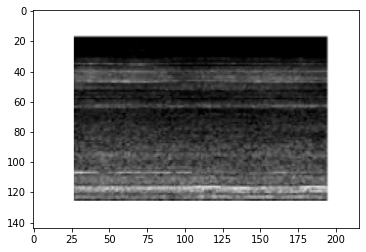

In [3]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[100], cmap='gray')

In [4]:
# Satır ve sütun sayısını saklayalım
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]


# Verilerimize 4. bir boyut eklememiz gerekiyor, böylece 
# (6998,28,28) ila (6998,28,28,1) arasındaki orijinal görüntü şeklimiz
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# tek bir görüntünün şeklini sakla
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
X_train = X_train.astype('float32') #uint8 originally
X_test = X_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
X_train /= 255.0
X_test /= 255.0

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (6985, 144, 216, 1)
6985 train samples
1747 test samples


In [5]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

Number of Classes: 10


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

In [ ]:
batch_size = 128
epochs = 50


history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
55/55 [==============================] - 496s 9s/step - loss: 2.2465 - accuracy: 0.1668 - val_loss: 2.2092 - val_accuracy: 0.2736
Epoch 2/50
55/55 [==============================] - 499s 9s/step - loss: 2.1931 - accuracy: 0.2316 - val_loss: 2.1575 - val_accuracy: 0.2673
Epoch 3/50
55/55 [==============================] - 503s 9s/step - loss: 2.1369 - accuracy: 0.2633 - val_loss: 2.0963 - val_accuracy: 0.3394
Epoch 4/50
55/55 [==============================] - 504s 9s/step - loss: 2.0720 - accuracy: 0.2862 - val_loss: 2.0322 - val_accuracy: 0.2696
Epoch 5/50
55/55 [==============================] - 504s 9s/step - loss: 2.0070 - accuracy: 0.3081 - val_loss: 1.9695 - val_accuracy: 0.3274
Epoch 6/50
55/55 [==============================] - 499s 9s/step - loss: 1.9458 - accuracy: 0.3247 - val_loss: 1.9050 - val_accuracy: 0.3148
Epoch 7/50
55/55 [==============================] - 503s 9s/step - loss: 1.8939 - accuracy: 0.3215 - val_loss: 1.8557 - val_accuracy: 0.3326
Epoch 8/50
55

In [ ]:
history_dict = history.history


In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
y_test[2]

In [ ]:
# Get the first image by index 0 of x_test and show it's shape
input_im = X_test[2]
print(input_im.shape)

# We need to add a 4th dimension to the first axis
input_im = input_im.reshape(1,28,28,1) 
print(input_im.shape)

# We now get the predictions for that single image
pred = np.argmax(model.predict(input_im), axis=-1)
print(pred)